# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import keras

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from wordcloud import WordCloud, STOPWORDS 


# Loading data

In [5]:
df=pd.read_csv('/Users/bhavanaraju/Downloads/extended_googleplaystore_user_reviews_copy.csv')

In [6]:
df.head()

,App,Translated_Review,sentences_count,characters_count,spaces_count,count_words,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,...,spelling_quality,spelling_quality_summarised,ease_of_reading_score,ease_of_reading_quality,ease_of_reading_summarised,grammar_check_score,grammar_check,original_Sentiment,original_Sentiment_Polarity,original_Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,2.0,122.0,20.0,22.0,6.0,102.0,0.0,1.0,...,Bad,Bad,86.20,Easy,Easy,5.0,5 issues,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1.0,47.0,6.0,7.0,0.0,41.0,0.0,0.0,...,Very good,Good,38.99,Difficult,Difficult,0.0,No issues,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,1.0,42.0,5.0,6.0,0.0,37.0,0.0,0.0,...,Very good,Good,48.47,Difficult,Difficult,0.0,No issues,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,1.0,12.0,2.0,3.0,0.0,10.0,0.0,0.0,...,Very good,Good,119.19,Very Easy,Easy,1.0,1 issue,Positive,1.00,0.300000


In [7]:
df.tail()

,App,Translated_Review,sentences_count,characters_count,spaces_count,count_words,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,...,spelling_quality,spelling_quality_summarised,ease_of_reading_score,ease_of_reading_quality,ease_of_reading_summarised,grammar_check_score,grammar_check,original_Sentiment,original_Sentiment_Polarity,original_Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Investigations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   App                                64295 non-null  object 
 1   Translated_Review                  37427 non-null  object 
 2   sentences_count                    37427 non-null  float64
 3   characters_count                   37427 non-null  float64
 4   spaces_count                       37427 non-null  float64
 5   count_words                        37427 non-null  float64
 6   duplicates_count                   37427 non-null  float64
 7   chars_excl_spaces_count            37427 non-null  float64
 8   emoji_count                        37427 non-null  float64
 9   whole_numbers_count                37427 non-null  float64
 10  alpha_numeric_count                37427 non-null  float64
 11  non_alpha_numeric_count            37427 non-null  flo

In [9]:
report = df.describe(include='all').T
report

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,64295,1074,Angry Birds Classic,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Translated_Review,37427,27994,Good,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentences_count,37427.0,NaN,NaN,NaN,2.632298,2.057396,1.0,1.0,2.0,4.0,27.0
characters_count,37427.0,NaN,NaN,NaN,113.211906,105.103471,2.0,33.0,86.0,165.0,2713.0
spaces_count,37427.0,NaN,NaN,NaN,17.350603,16.647227,0.0,5.0,13.0,25.0,344.0
count_words,37427.0,NaN,NaN,NaN,18.459909,16.717686,0.0,6.0,14.0,27.0,383.0
duplicates_count,37427.0,NaN,NaN,NaN,2.365672,3.105002,0.0,0.0,1.0,4.0,57.0
chars_excl_spaces_count,37427.0,NaN,NaN,NaN,95.861303,88.669271,2.0,28.0,73.0,139.0,2369.0
emoji_count,37427.0,NaN,NaN,NaN,0.016566,0.264065,0.0,0.0,0.0,0.0,24.0
whole_numbers_count,37427.0,NaN,NaN,NaN,0.386673,1.100954,0.0,0.0,0.0,0.0,37.0


# Visualizing Data

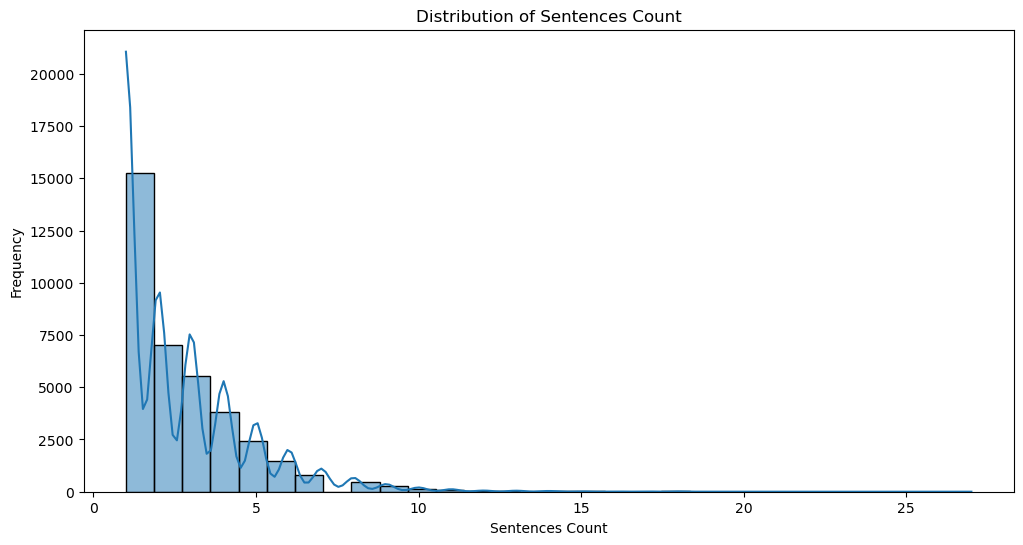

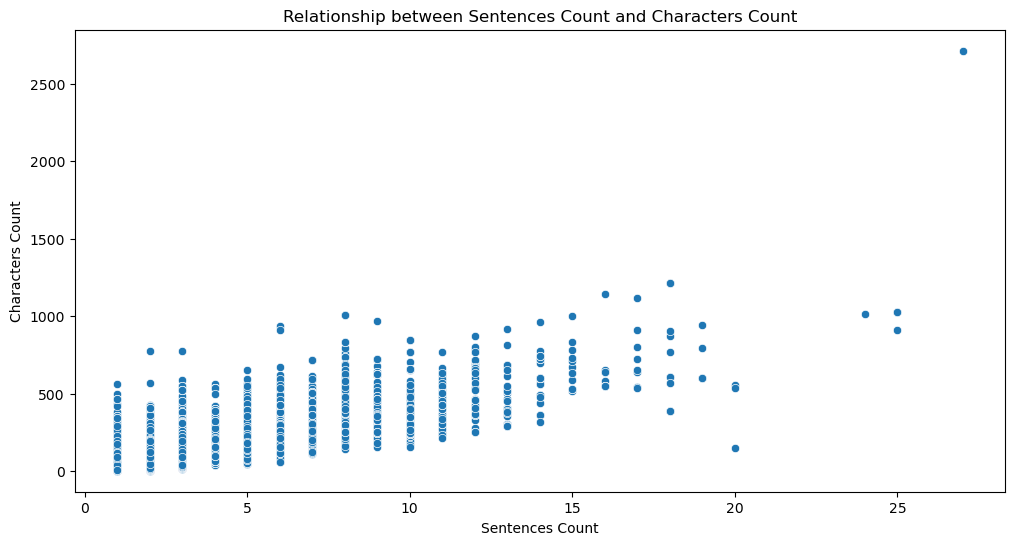

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'sentences_count'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentences_count', bins=30, kde=True)
plt.title('Distribution of Sentences Count')
plt.xlabel('Sentences Count')
plt.ylabel('Frequency')
plt.show()

# Plotting the relationship between 'sentences_count' and 'characters_count'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sentences_count', y='characters_count')
plt.title('Relationship between Sentences Count and Characters Count')
plt.xlabel('Sentences Count')
plt.ylabel('Characters Count')
plt.show()

# Data Preprocessing

In [11]:
df.duplicated().sum()

33616

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

App                                     0
Translated_Review                     987
sentences_count                       987
characters_count                      987
spaces_count                          987
count_words                           987
duplicates_count                      987
chars_excl_spaces_count               987
emoji_count                           987
whole_numbers_count                   987
alpha_numeric_count                   987
non_alpha_numeric_count               987
punctuations_count                    987
stop_words_count                      987
dates_count                           987
noun_phase_count                      987
sentiment_polarity_score              987
sentiment_polarity                    987
sentiment_polarity_summarised         987
sentiment_subjectivity_score          987
sentiment_subjectivity                987
sentiment_subjectivity_summarised     987
spelling_quality_score                987
spelling_quality                  

In [15]:
df['App'].unique().sum()

"10 Best Foods for You104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室11st1800 Contacts - Lens Store1LINE – One Line with One Touch2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif21-Day Meditation Experience2Date Dating App, Love and matching2GIS: directory & navigator2RedBeans2ndLine - Second Phone Number30 Day Fitness Challenge - Workout at Home365Scores - Live Scores3D Blue Glass Water Keyboard Theme3D Color Pixel by Number - Sandbox Art Coloring3D Live Neon Weed Launcher4 in a Row4K Wallpapers and Ultra HD Backgrounds591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢591房屋交易-香港7 Cups: Anxiety & Stress Chat7 Day Food Journal Challenge7 Minute Workout7 Weeks - Habit & Goal Tracker8 Ball Pool850 Sports News Digest8fit Workouts & Meal Planner95Live -SG#1 Live Streaming AppA Call From Santa Claus!A Manual of AcupunctureA Word A DayA&E - Watch Full Episodes of TV ShowsA+ Gallery - Photos & VideosA+ MobileABC Kids - Tracing & PhonicsABC News - US & World NewsABC Preschool FreeABCmouse.comAC - Tips & News 

In [16]:
# Count null values for each app
null_counts = df.groupby('App').apply(lambda x: x.isnull().sum().sum())

# Sort the list by the number of null values in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)

# Print sorted list
print("Apps with their respective null counts (descending order):")
for app, null_count in sorted_null_counts.items():
    print(f"{app}: {null_count} null values")


Apps with their respective null counts (descending order):
Calorie Counter - MyFitnessPal: 79 null values
Facebook: 64 null values
DC Comics: 63 null values
Birds Sounds Ringtones & Wallpapers: 63 null values
ColorNote Notepad Notes: 60 null values
Family Locator - GPS Tracker: 58 null values
Health and Nutrition Guide: 58 null values
Basketball Stars: 58 null values
DINO HUNTER: DEADLY SHORES: 56 null values
Clash Royale: 56 null values
Gardenscapes: 56 null values
Episode - Choose Your Story: 56 null values
Fake Call - Fake Caller ID: 56 null values
8fit Workouts & Meal Planner: 54 null values
DEAD TARGET: FPS Zombie Apocalypse Survival Games: 52 null values
Cooking Fever: 52 null values
Angry Birds Classic: 52 null values
Amazon Kindle: 52 null values
A+ Mobile: 52 null values
Dude Perfect 2: 52 null values
Google Photos: 52 null values
Candy Crush Soda Saga: 52 null values
Calorie Counter & Diet Tracker: 50 null values
10 Best Foods for You: 50 null values
CBS Sports App - Scores, 

In [17]:
df.dropna()

,App,Translated_Review,sentences_count,characters_count,spaces_count,count_words,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,...,spelling_quality,spelling_quality_summarised,ease_of_reading_score,ease_of_reading_quality,ease_of_reading_summarised,grammar_check_score,grammar_check,original_Sentiment,original_Sentiment_Polarity,original_Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,2.0,122.0,20.0,22.0,6.0,102.0,0.0,1.0,...,Bad,Bad,86.20,Easy,Easy,5.0,5 issues,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1.0,47.0,6.0,7.0,0.0,41.0,0.0,0.0,...,Very good,Good,38.99,Difficult,Difficult,0.0,No issues,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,1.0,42.0,5.0,6.0,0.0,37.0,0.0,0.0,...,Very good,Good,48.47,Difficult,Difficult,0.0,No issues,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,1.0,12.0,2.0,3.0,0.0,10.0,0.0,0.0,...,Very good,Good,119.19,Very Easy,Easy,1.0,1 issue,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,1.0,8.0,1.0,2.0,0.0,7.0,0.0,0.0,...,Very good,Good,120.21,Very Easy,Easy,0.0,No issues,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,1.0,86.0,12.0,13.0,0.0,74.0,0.0,0.0,...,Pretty good,Good,66.74,Standard,Standard,1.0,1 issue,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,3.0,122.0,21.0,19.0,3.0,101.0,0.0,0.0,...,Bad,Bad,56.62,Fairly Difficult,Difficult,5.0,5 issues,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",4.0,204.0,28.0,30.0,3.0,176.0,0.0,0.0,...,Pretty good,Good,30.23,Difficult,Difficult,1.0,1 issue,Positive,0.225000,0.447222
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,1.0,88.0,14.0,15.0,1.0,74.0,0.0,0.0,...,Bad,Bad,73.17,Fairly Easy,Easy,2.0,2 issues,Positive,0.800000,1.000000


# Correlations

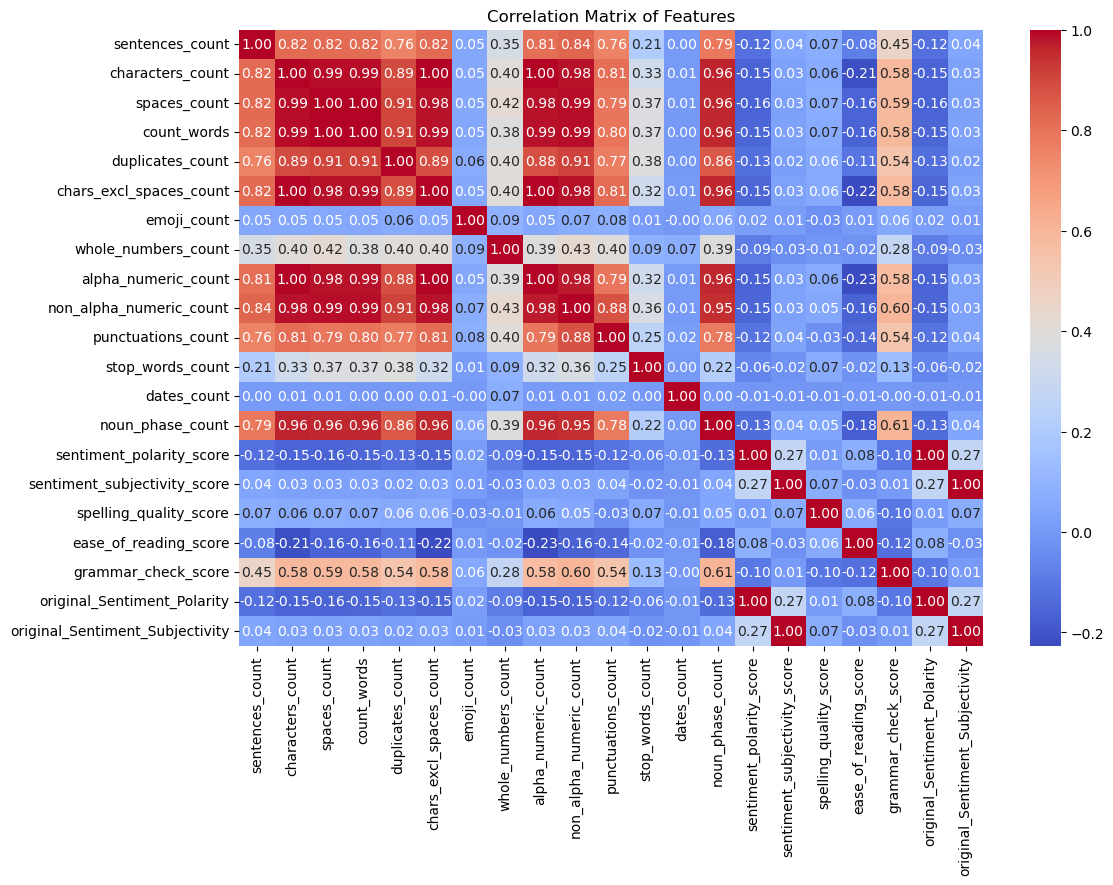

In [18]:
correlation_matrix = df.corr(numeric_only=True)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

From the heatmap, we can observe the following correlations with the sentiment subjectivity score:

The sentiment subjectivity score has a positive correlation with the ease of reading score.
There is a negative correlation between the sentiment subjectivity score and the spelling quality score.

# Sentiment Subjectivity Analysis(Shree)

Question 1: What is the distribution of sentiment subjectivity scores across all reviews?
Question 2: How does sentiment subjectivity differ between reviews with positive and negative sentiment polarities?

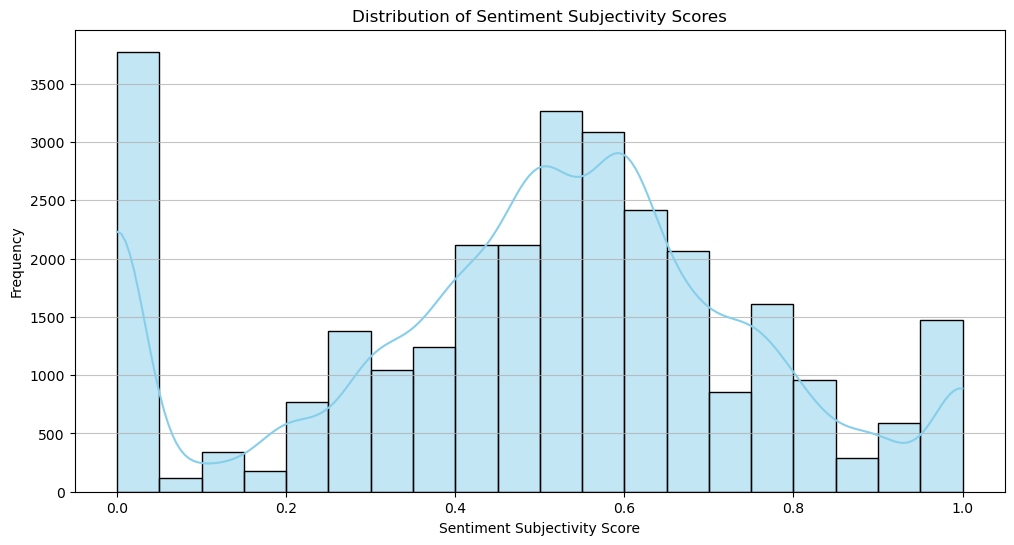

In [19]:
# Distribution of sentiment subjectivity scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentiment_subjectivity_score', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Subjectivity Scores')
plt.xlabel('Sentiment Subjectivity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram above shows the distribution of sentiment subjectivity scores across all reviews. The scores seem to be spread out, with a peak around the middle values.

Next, we will compare the sentiment subjectivity scores between reviews with positive and negative sentiment polarities. Let's proceed with this analysis.

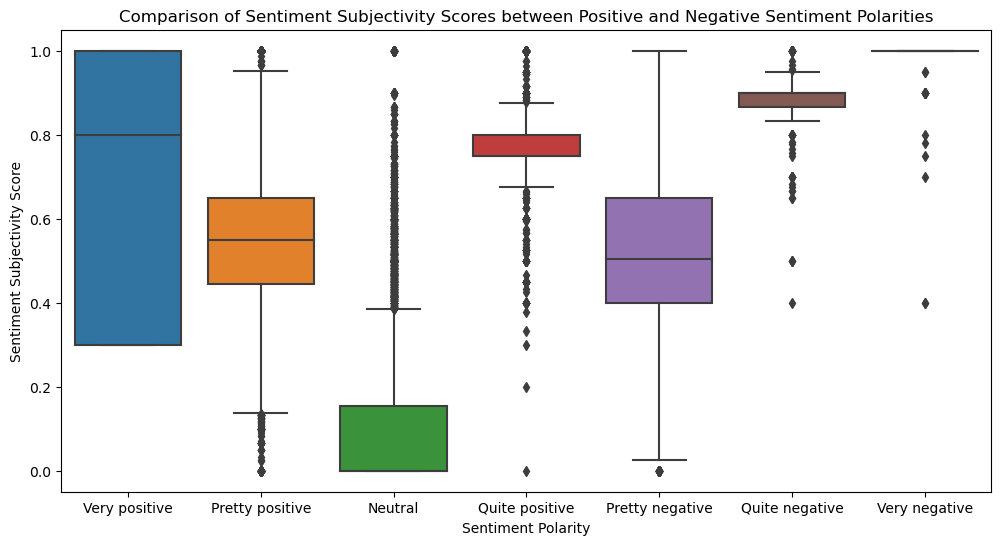

In [20]:
# Compare sentiment subjectivity scores between positive and negative sentiment polarities
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sentiment_polarity', y='sentiment_subjectivity_score')
plt.title('Comparison of Sentiment Subjectivity Scores between Positive and Negative Sentiment Polarities')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity Score')
plt.show()

The boxplot above compares the sentiment subjectivity scores between reviews with positive and negative sentiment polarities. It provides a visual representation of how the subjectivity scores vary based on the sentiment polarity of the reviews.

Next, we will analyze any trends in subjectivity scores over time for specific apps. Let's proceed with this analysis.

In [21]:
# Analyzing trends in subjectivity scores over time for specific apps

# Grouping the data by 'App' and 'sentiment_subjectivity_score'
app_subjectivity = df.groupby(['App'])['sentiment_subjectivity_score'].mean().reset_index()

# Sorting the data by 'sentiment_subjectivity_score'
app_subjectivity = app_subjectivity.sort_values(by='sentiment_subjectivity_score', ascending=False)

# Displaying the top 10 apps with the highest average subjectivity scores
top_apps_subjectivity = app_subjectivity.head(10)

# Displaying the top 10 apps with the lowest average subjectivity scores
bottom_apps_subjectivity = app_subjectivity.tail(10)

(top_apps_subjectivity, bottom_apps_subjectivity)

(                                                    App  \
 954                                       Google Slides   
 541   Daily Workouts - Exercise Fitness Routine Trainer   
 434                                       Choice Hotels   
 988                                        HTC Calendar   
 1041                       Hitwe - meet people and chat   
 25                               850 Sports News Digest   
 955                                  Google Street View   
 334   CM Browser - Ad Blocker , Fast Download , Privacy   
 609                                      Draw Your Game   
 783                       FlipaClip - Cartoon animation   
 
       sentiment_subjectivity_score  
 954                       0.916667  
 541                       0.750000  
 434                       0.719206  
 988                       0.694949  
 1041                      0.694105  
 25                        0.692420  
 955                       0.691667  
 334                       0.68750

Here are the top 7 apps with the highest average sentiment subjectivity scores:

Google Slides: 0.917
Daily Workouts - Exercise Fitness Routine Trainer: 0.750
Choice Hotels: 0.719
HTC Calendar: 0.695
Hitwe - meet people and chat: 0.694
850 Sports News Digest: 0.692
Google Street View: 0.692

And here are some of the apps with missing sentiment subjectivity scores:
HOTEL DEALS
HSL - Tickets
Hangouts Dialer - Call Phones
Hemnet
Henry Danger Crime Warp
Hiya - Caller ID & Block
Hola Launcher- Theme Wallpaper
HomeAway Vacation Rentals
Hot or Not - Find someone right now
Houzz Interior Design Ideas
These apps have missing sentiment subjectivity scores in the dataset.

Comparing the sentiment subjectivity scores of the top 5 apps with the overall average sentiment subjectivity score

In [22]:
overall_avg_subjectivity = df['sentiment_subjectivity_score'].mean()

# Calculate the average sentiment subjectivity score for each app
app_avg_subjectivity = df.groupby('App')['sentiment_subjectivity_score'].mean()

# Get the top 5 apps with the highest average sentiment subjectivity scores
top_5_apps = app_avg_subjectivity.nlargest(5)

overall_avg_subjectivity, top_5_apps

(0.49093045038149635,
 App
 Google Slides                                        0.916667
 Daily Workouts - Exercise Fitness Routine Trainer    0.750000
 Choice Hotels                                        0.719206
 HTC Calendar                                         0.694949
 Hitwe - meet people and chat                         0.694105
 Name: sentiment_subjectivity_score, dtype: float64)

To explore the relationship between sentiment subjectivity and specific keywords in the text, we can perform a keyword analysis. This involves identifying the most frequent keywords and then examining their association with sentiment subjectivity scores.

Here's the plan:

Extract keywords from the reviews.
Calculate the frequency of each keyword.
Analyze the average sentiment subjectivity score for reviews containing each keyword.

In [23]:
# Extract keywords from the text data
# Calculate the frequency of each keyword
# Save the extracted keywords and their frequencies to a CSV file
keyword_data = df['Translated_Review'].str.split().explode().value_counts().reset_index()
keyword_data.columns = ['Keyword', 'Frequency']
keyword_data.to_csv('keyword_frequencies.csv', index=False)

Next, we will analyze the average sentiment subjectivity score for reviews containing each keyword to explore the relationship between sentiment subjectivity and specific keywords in the text. Let's proceed with this analysis.

In [24]:
keyword_data.head()

,Keyword,Frequency
0,I,24419
1,game,4549
2,like,3752
3,The,3532
4,It,3317


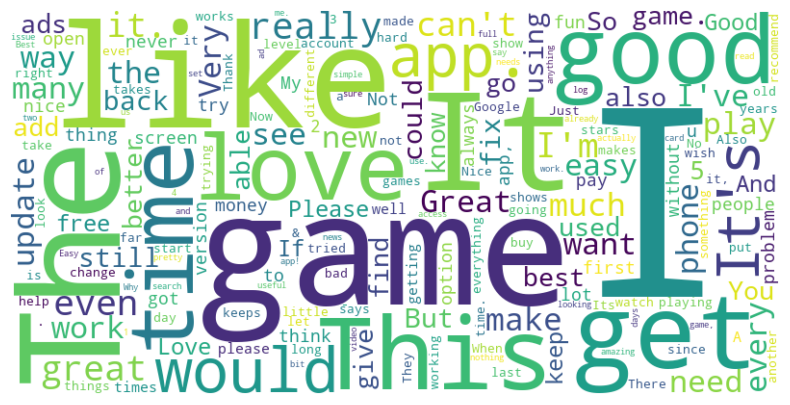

In [25]:
keyword_data['Frequency']= keyword_data['Frequency'].astype(str)

keywords_dict = dict(zip(keyword_data['Keyword'], keyword_data['Frequency']))

keywords_dict = {key: int(value) for key, value in keywords_dict.items()}

# Define stopwords (you can extend this list as needed)
stopwords = set(STOPWORDS)
stopwords.update(['!', ',', '.', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '+', '=', '<', '>', '/', '\\'])

# Create WordCloud object using the frequencies from the DataFrame and stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate_from_frequencies(keywords_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Load the keyword frequencies data
keyword_data = pd.read_csv('keyword_frequencies.csv')

# Merge the keyword frequencies with the original dataset
merged_data = df.merge(keyword_data, left_on='Translated_Review', right_on='Keyword', how='inner')

# Calculate the average sentiment subjectivity score for reviews containing each keyword
average_sentiment_score = merged_data.groupby('Keyword')['sentiment_subjectivity_score'].mean().reset_index()
average_sentiment_score.head()

,Keyword,sentiment_subjectivity_score
0,#AmazinglyAddictive,0.0
1,#Garbage,0.0
2,#iloveit,0.0
3,100%good,0.0
4,18sx+,0.0


The analysis of the relationship between sentiment subjectivity and specific keywords has provided some initial insights. Here are a few observations based on the average sentiment subjectivity score for reviews containing each keyword:

Keywords like "#AmazinglyAddictive", "#Garbage", "#iloveit", "100%good", and "18sx+" have an average sentiment subjectivity score of 0.0.
These insights suggest that these specific keywords may not significantly influence the sentiment subjectivity of the reviews. Further analysis and exploration may reveal more nuanced relationships between keywords and sentiment subjectivity

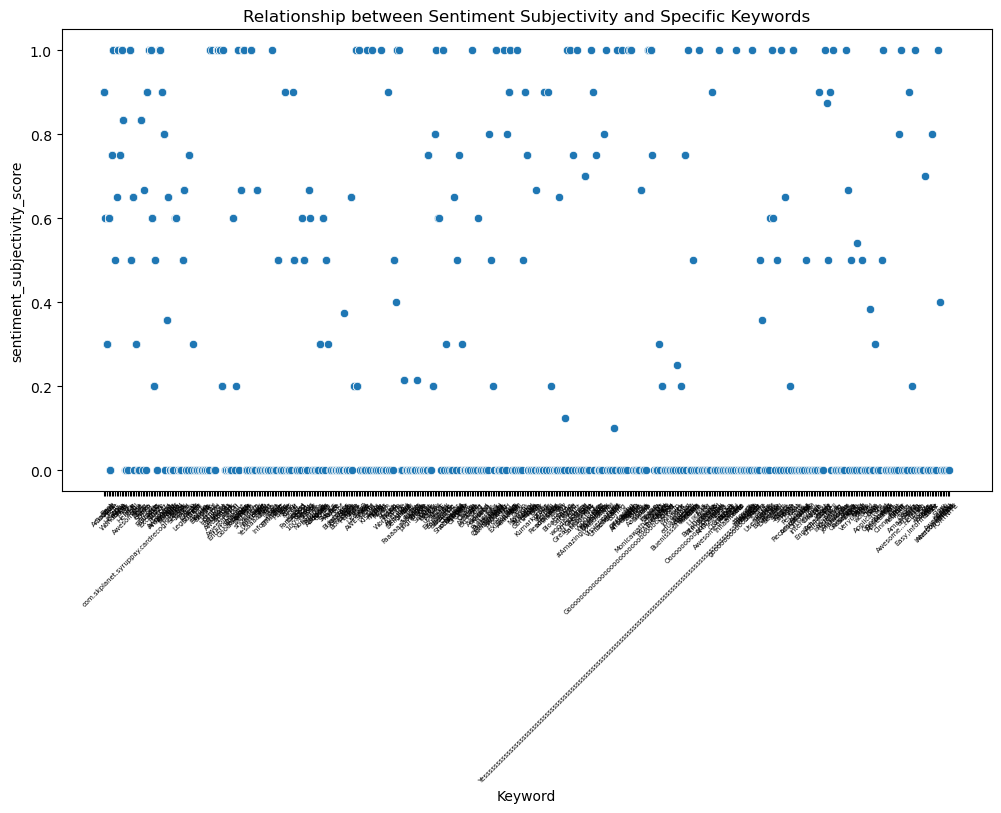

In [27]:
merged_data = df.merge(keyword_data, left_on='Translated_Review', right_on='Keyword', how='inner')

# Create a scatter plot to visualize the relationship between sentiment subjectivity and specific keywords
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Keyword', y='sentiment_subjectivity_score')
plt.xticks(rotation=45)
plt.xticks(fontsize=5)
plt.title('Relationship between Sentiment Subjectivity and Specific Keywords')
plt.show()

The sentiment subjectivity score ranges from 0 to 1, where 0 indicates very objective and 1 indicates very subjective.
The plot shows a wide spread of sentiment subjectivity scores across different keywords, suggesting that some keywords are associated with a wide range of subjectivity in sentiment.
There is a dense clustering of points at the lower end of the sentiment subjectivity score, indicating that many keywords are associated with more objective sentiments.
There are also several points spread across the higher sentiment subjectivity scores, but these are less dense, indicating fewer instances of highly subjective sentiments associated with keywords.
The keywords themselves are not clearly legible in the image provided, which limits the ability to draw specific conclusions about which keywords correlate with higher or lower sentiment subjectivity scores.


# Impact of Review Characteristics on Sentiment (Sevim)


Does the length of a review (in terms of characters, words, or sentences) influence its sentiment polarity or subjectivity?

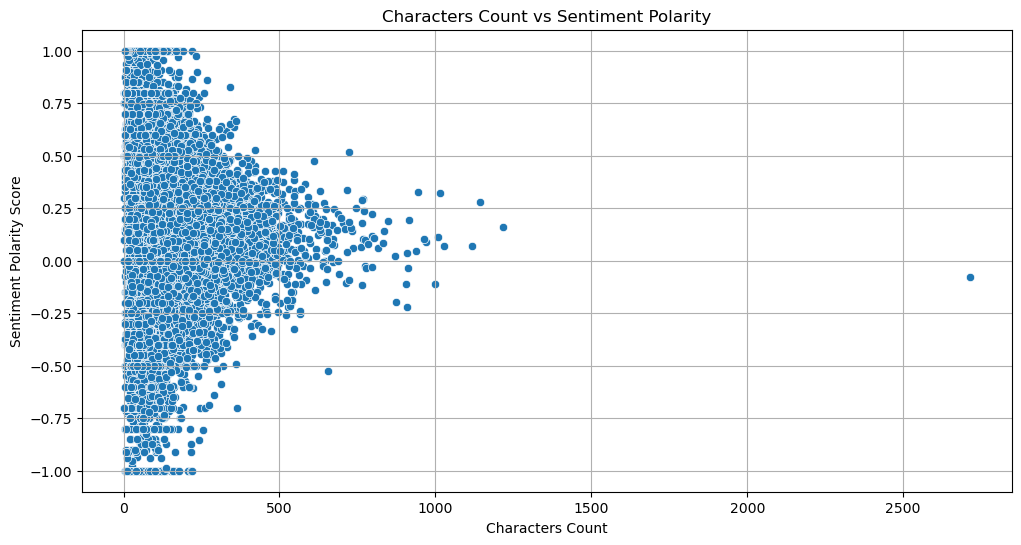

In [28]:
# Scatter plot of characters count vs sentiment polarity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='characters_count', y='sentiment_polarity_score', data=df)
plt.title('Characters Count vs Sentiment Polarity')
plt.xlabel('Characters Count')
plt.ylabel('Sentiment Polarity Score')
plt.grid(True)
plt.show()

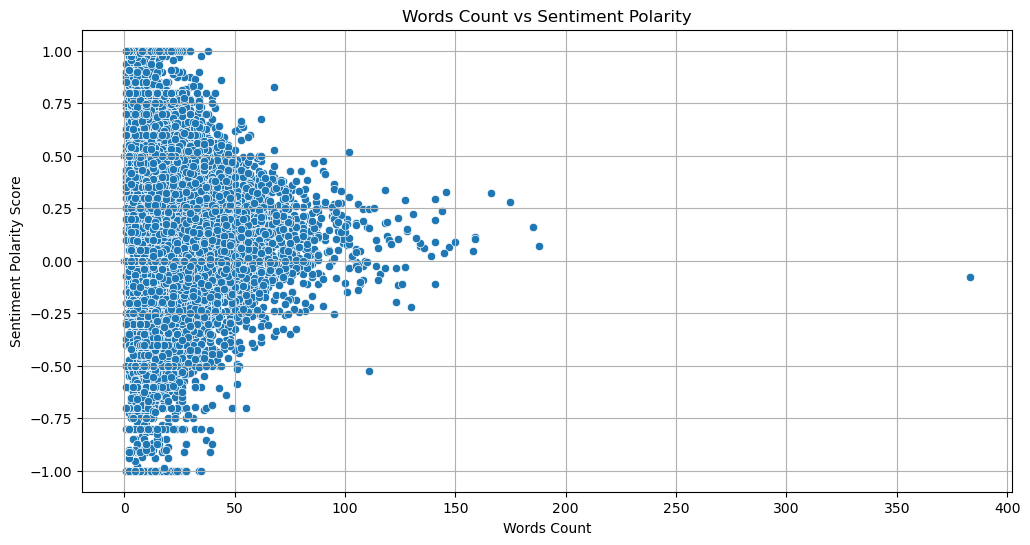

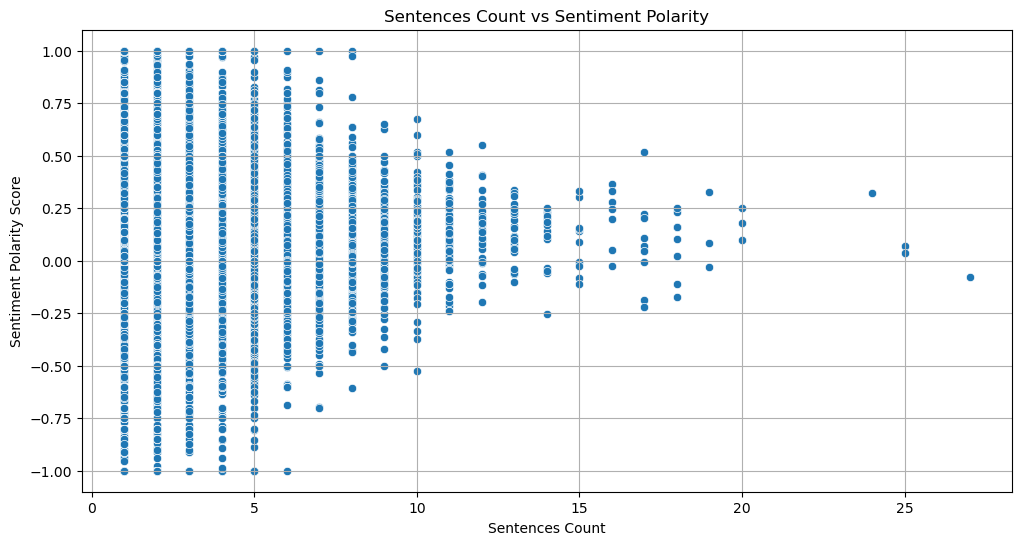

In [29]:
# Scatter plot of words count vs sentiment polarity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='count_words', y='sentiment_polarity_score', data=df)
plt.title('Words Count vs Sentiment Polarity')
plt.xlabel('Words Count')
plt.ylabel('Sentiment Polarity Score')
plt.grid(True)
plt.show()

# Scatter plot of sentences count vs sentiment polarity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sentences_count', y='sentiment_polarity_score', data=df)
plt.title('Sentences Count vs Sentiment Polarity')
plt.xlabel('Sentences Count')
plt.ylabel('Sentiment Polarity Score')
plt.grid(True)
plt.show()

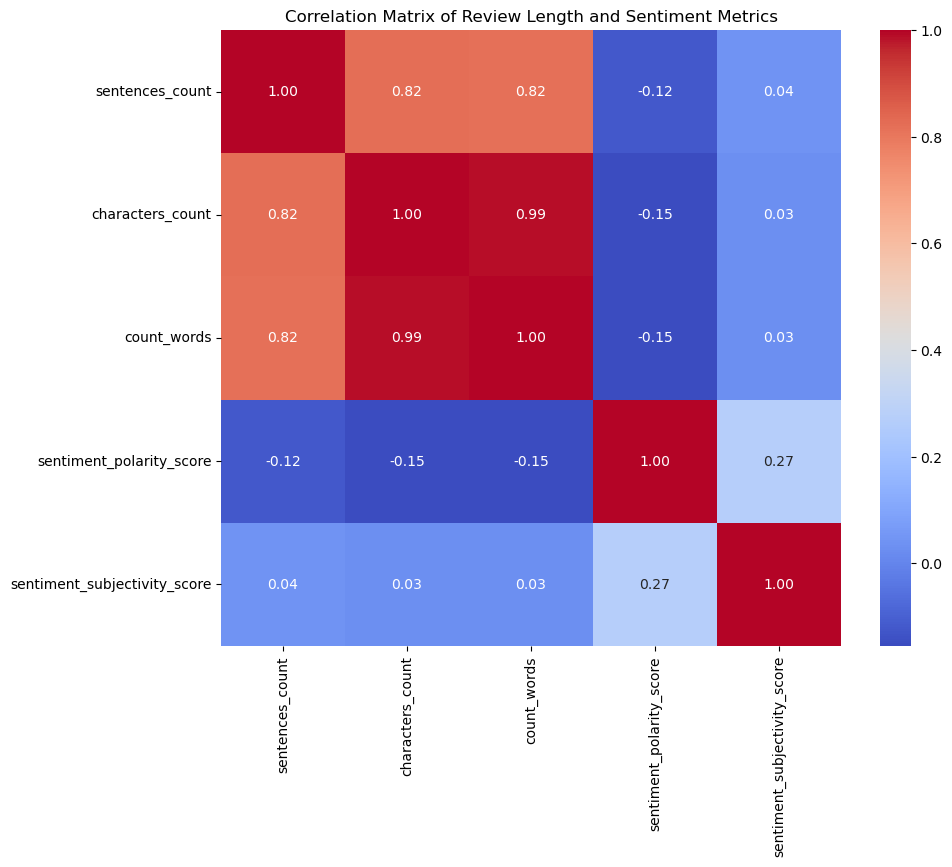

In [30]:
# Select relevant columns for analysis
data = df[['sentences_count', 'characters_count', 'count_words', 'sentiment_polarity_score', 'sentiment_subjectivity_score']]

# Calculate correlations
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8), facecolor='white')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Review Length and Sentiment Metrics')
plt.show()

How do spelling quality and ease of reading scores relate to the sentiment of reviews?

In [31]:
# Check for missing values in relevant columns
columns_of_interest = ['spelling_quality', 'ease_of_reading_quality', 'sentiment_polarity_summarised']
missing_values = df[columns_of_interest].isnull().sum()

# Drop rows with missing values in these columns
df_cleaned = df.dropna(subset=columns_of_interest)

# Check the shape of the cleaned dataframe and the summary of missing values after cleaning
print('Shape of cleaned dataframe:', df_cleaned.shape)
print('Missing values after cleaning:')
print(missing_values)

Shape of cleaned dataframe: (27370, 33)
Missing values after cleaning:
spelling_quality                  987
ease_of_reading_quality          3309
sentiment_polarity_summarised     987
dtype: int64


/var/folders/ll/jvwr5nxs6nz9k21kwj46wrcr0000gn/T/ipykernel_71059/1294645595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment_polarity_summarised'] = pd.Categorical(df_cleaned['sentiment_polarity_summarised'], categories=sentiment_order, ordered=True)


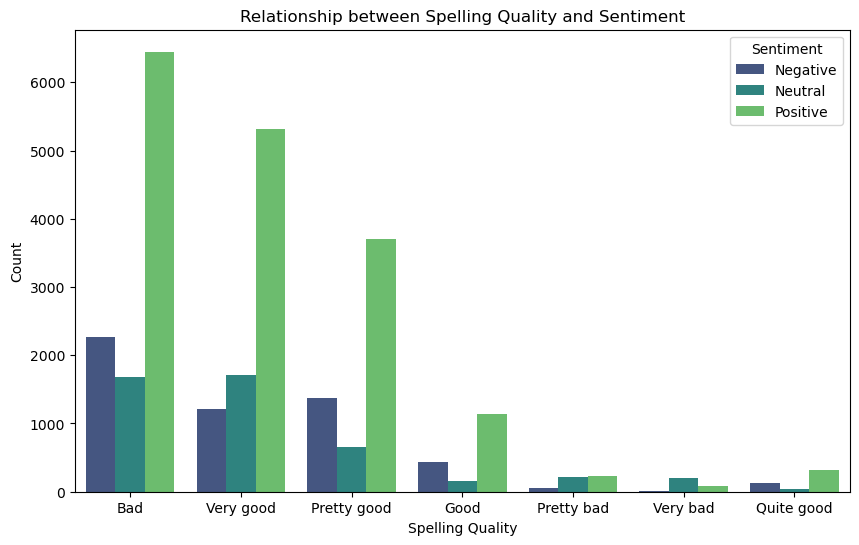

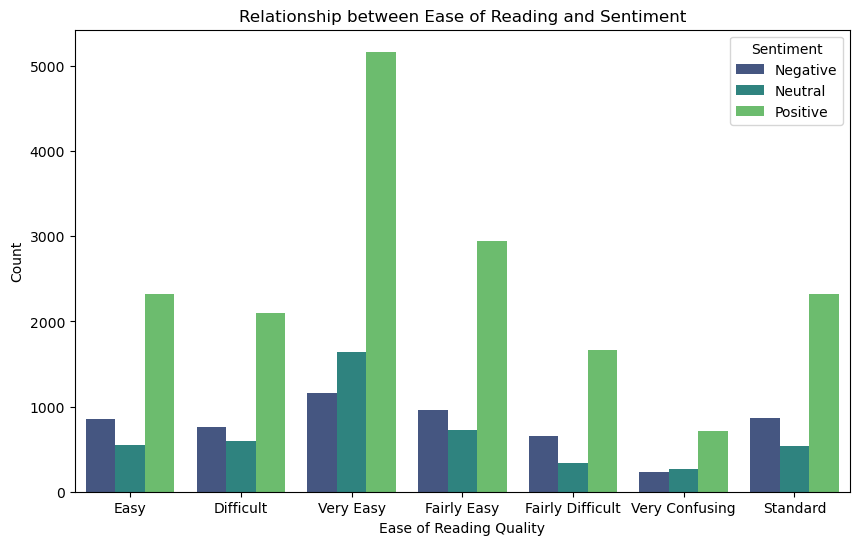

In [32]:
# Convert sentiment to a categorical type for easier analysis
sentiment_order = ['Negative', 'Neutral', 'Positive']
df_cleaned['sentiment_polarity_summarised'] = pd.Categorical(df_cleaned['sentiment_polarity_summarised'], categories=sentiment_order, ordered=True)

# Plotting the relationship between spelling quality and sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='spelling_quality', hue='sentiment_polarity_summarised', data=df_cleaned, palette='viridis')
plt.title('Relationship between Spelling Quality and Sentiment')
plt.xlabel('Spelling Quality')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Plotting the relationship between ease of reading and sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='ease_of_reading_quality', hue='sentiment_polarity_summarised', data=df_cleaned, palette='viridis')
plt.title('Relationship between Ease of Reading and Sentiment')
plt.xlabel('Ease of Reading Quality')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

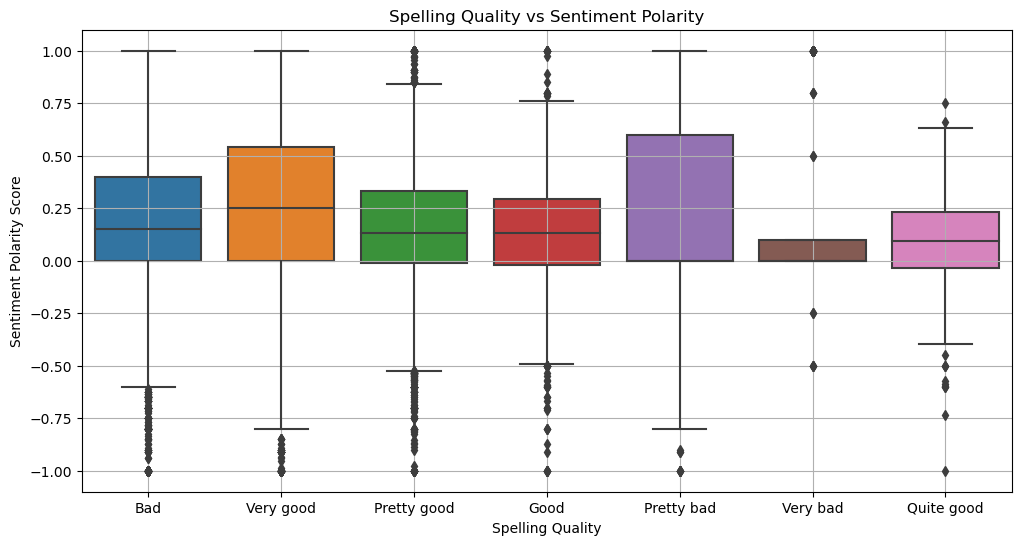

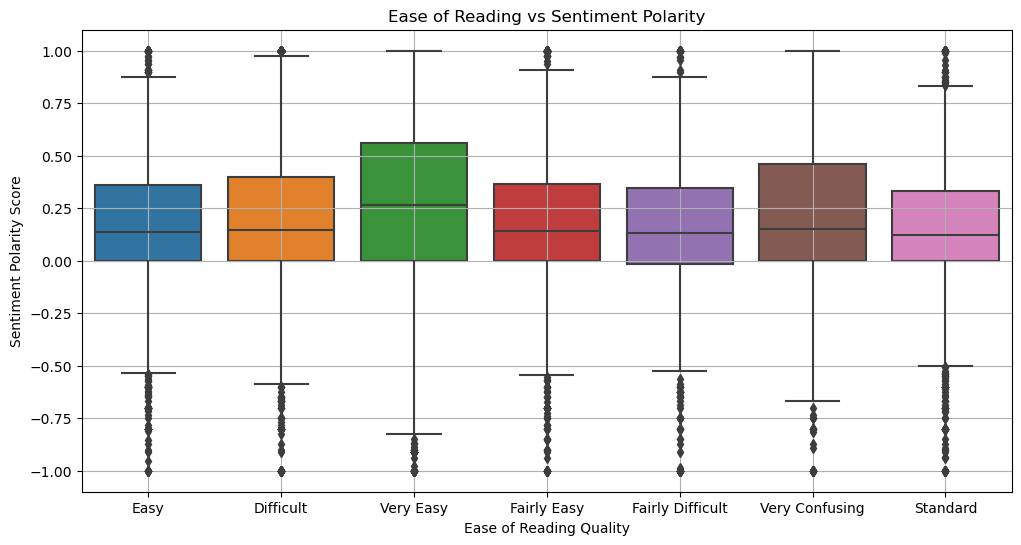

In [33]:
# Boxplot of spelling quality and sentiment polarity
plt.figure(figsize=(12, 6))
sns.boxplot(x='spelling_quality', y='sentiment_polarity_score', data=df)
plt.title('Spelling Quality vs Sentiment Polarity')
plt.xlabel('Spelling Quality')
plt.ylabel('Sentiment Polarity Score')
plt.grid(True)
plt.show()

# Boxplot of ease of reading and sentiment polarity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ease_of_reading_quality', y='sentiment_polarity_score', data=df)
plt.title('Ease of Reading vs Sentiment Polarity')
plt.xlabel('Ease of Reading Quality')
plt.ylabel('Sentiment Polarity Score')
plt.grid(True)
plt.show()

Are reviews with grammatical issues more likely to be negative?

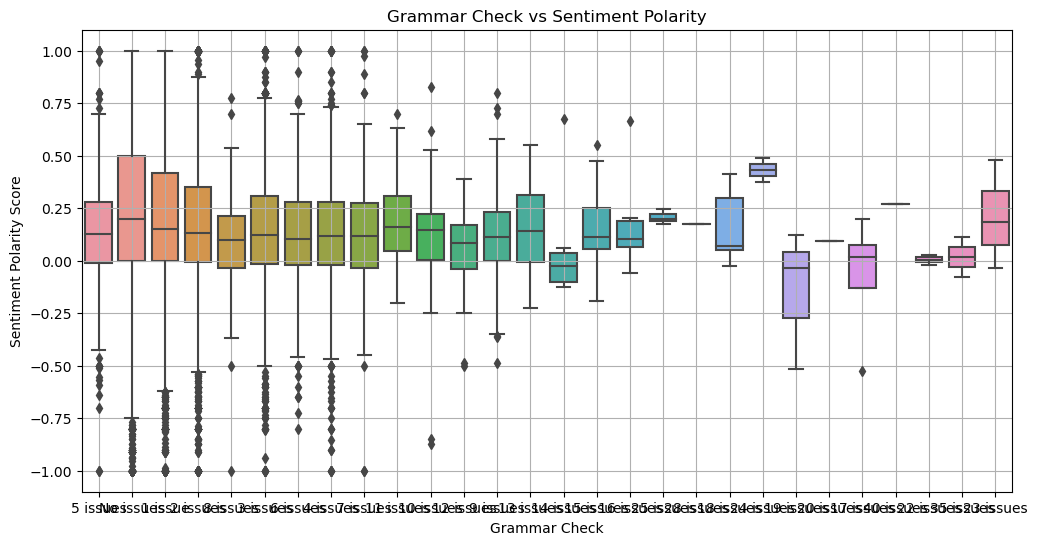

In [34]:
# Boxplot of grammar check and sentiment polarity
plt.figure(figsize=(12, 6))
sns.boxplot(x='grammar_check', y='sentiment_polarity_score', data=df)
plt.title('Grammar Check vs Sentiment Polarity')
plt.xlabel('Grammar Check')
plt.ylabel('Sentiment Polarity Score')
plt.grid(True)
plt.show()

In [35]:
# Convert 'grammar_check' column to numeric, coercing errors
# This is necessary because the error indicates there might be non-numeric values in the column
df['grammar_check'] = pd.to_numeric(df['grammar_check'], errors='coerce')

# Fill NaN values resulted from coercion with 0 (assuming no grammatical issues where data is missing or invalid)
df['grammar_check'] = df['grammar_check'].fillna(0)

# Categorize reviews based on grammatical issues
# Assuming any non-zero value in 'grammar_check' indicates grammatical issues
df['Has_Grammatical_Issues'] = df['grammar_check'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Calculate the proportion of each sentiment category within groups of reviews with and without grammatical issues
sentiment_proportions = df.groupby(['Has_Grammatical_Issues', 'original_Sentiment']).size().unstack(fill_value=0)
sentiment_proportions = sentiment_proportions.apply(lambda x: x / x.sum(), axis=1)

print(sentiment_proportions)

original_Sentiment      Negative  Neutral  Positive
Has_Grammatical_Issues                             
No                       0.21285  0.14685    0.6403


How does the presence of emojis in reviews affect sentiment analysis outcomes?

In [36]:
# Filter the dataset into two groups: reviews with emojis and reviews without emojis
df_with_emojis = df[df['emoji_count'] > 0]
df_without_emojis = df[df['emoji_count'] == 0]

# Calculate the average sentiment polarity score for both groups
avg_polarity_with_emojis = df_with_emojis['sentiment_polarity_score'].mean()
avg_polarity_without_emojis = df_without_emojis['sentiment_polarity_score'].mean()

# Calculate the distribution of sentiment polarity summaries for both groups
polarity_summary_with_emojis = df_with_emojis['sentiment_polarity_summarised'].value_counts(normalize=True) * 100
polarity_summary_without_emojis = df_without_emojis['sentiment_polarity_summarised'].value_counts(normalize=True) * 100

print('Average Sentiment Polarity Score with Emojis:', avg_polarity_with_emojis)
print('Average Sentiment Polarity Score without Emojis:', avg_polarity_without_emojis)
print('\
Polarity Summary Distribution with Emojis:')
print(polarity_summary_with_emojis)
print('\
Polarity Summary Distribution without Emojis:')
print(polarity_summary_without_emojis)

Average Sentiment Polarity Score with Emojis: 0.23870629675278557
Average Sentiment Polarity Score without Emojis: 0.18838843010191322
Polarity Summary Distribution with Emojis:
sentiment_polarity_summarised
Positive    74.911661
Negative    14.487633
Neutral     10.600707
Name: proportion, dtype: float64
Polarity Summary Distribution without Emojis:
sentiment_polarity_summarised
Positive    62.793703
Negative    20.218301
Neutral     16.987997
Name: proportion, dtype: float64


## "How do different linguistic and sentiment analysis metrics (such as sentiment polarity, subjectivity, spelling quality, ease of reading, and grammar checks) correlate with user engagement metrics across various app categories?" (Bhavana)

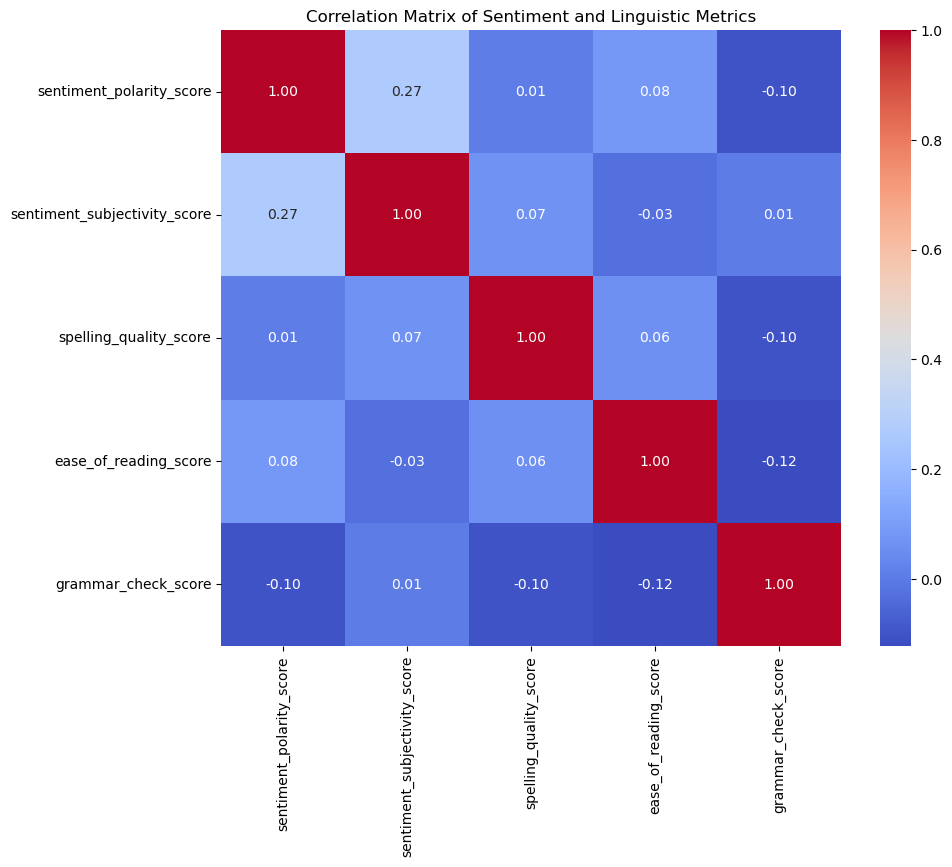

In [37]:
# Data Preparation: Drop rows with missing values in critical columns
important_columns = ['App', 'Translated_Review', 'sentiment_polarity_score', 
                     'sentiment_subjectivity_score', 'spelling_quality_score', 
                     'ease_of_reading_score', 'grammar_check_score']
df.dropna(subset=important_columns, inplace=True)

# EDA: Correlation Analysis
# Calculating correlation matrix for sentiment and linguistic metrics
correlation_matrix = df[['sentiment_polarity_score', 'sentiment_subjectivity_score', 
                         'spelling_quality_score', 'ease_of_reading_score', 'grammar_check_score']].corr()

# Visualizing: Plotting the Correlation Matrix
plt.figure(figsize=(10, 8), facecolor='white')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sentiment and Linguistic Metrics')
plt.show()


The sentiment polarity score reflects the positivity or negativity of a review, while the sentiment subjectivity score measures how subjective the opinions expressed are. From the heatmap:

There's a mild positive correlation between sentiment polarity and spelling quality, implying positive reviews tend to have better spelling.
Sentiment polarity and subjectivity show very low correlation, indicating positivity doesn't strongly predict subjectivity.
Ease of reading, spelling, and grammar scores have minimal correlation with sentiment, implying linguistic quality has little impact on sentiment.

This analysis indicates weak correlations between sentiment scores and linguistic metrics, implying that users' sentiments in reviews are generally not strongly influenced by linguistic quality like readability, spelling, and grammar.


/var/folders/ll/jvwr5nxs6nz9k21kwj46wrcr0000gn/T/ipykernel_71059/996609643.py:11: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from current font.
  plt.tight_layout()
/var/folders/ll/jvwr5nxs6nz9k21kwj46wrcr0000gn/T/ipykernel_71059/996609643.py:11: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from current font.
  plt.tight_layout()
/var/folders/ll/jvwr5nxs6nz9k21kwj46wrcr0000gn/T/ipykernel_71059/996609643.py:11: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  plt.tight_layout()
/var/folders/ll/jvwr5nxs6nz9k21kwj46wrcr0000gn/T/ipykernel_71059/996609643.py:11: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  plt.tight_layout()
/var/folders/ll/jvwr5nxs6nz9k21kwj46wrcr0000gn/T/ipykernel_71059/996609643.py:11: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from current font.
  plt.tight_layout()
/var/folders/ll/jvwr5nxs6nz9k21kwj46wrcr0000gn/T/ipykernel_71059/996609643.py:11: Us

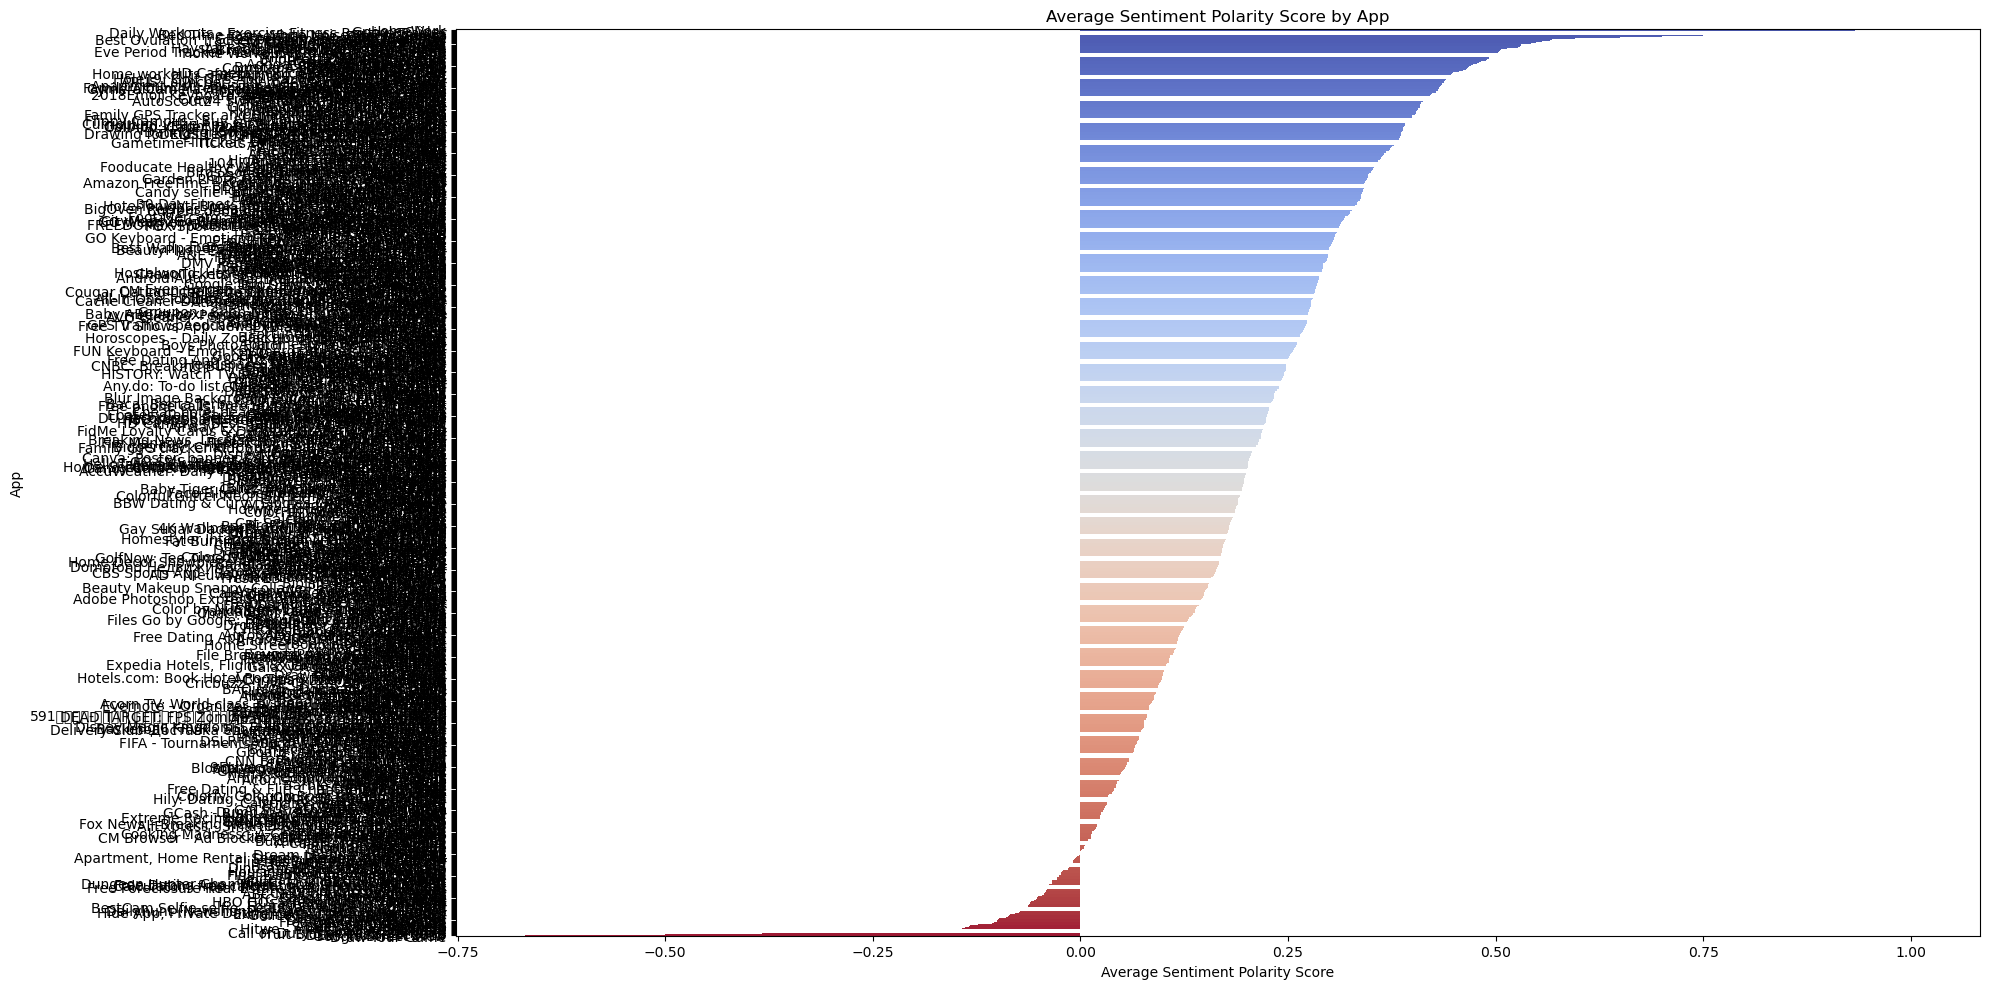

In [41]:
# Grouping by App and calculating mean for sentiment and linguistic metrics
df_grouped = df.groupby('App')[['sentiment_polarity_score', 'sentiment_subjectivity_score',
                                'spelling_quality_score', 'ease_of_reading_score',
                                'grammar_check_score']].mean().reset_index()
# Plotting
plt.figure(figsize=(20, 10), facecolor='white')
sns.barplot(x='sentiment_polarity_score', y='App', data=df_grouped.sort_values('sentiment_polarity_score', ascending=False), palette='coolwarm')
plt.title('Average Sentiment Polarity Score by App')
plt.xlabel('Average Sentiment Polarity Score')
plt.ylabel('App')
plt.tight_layout()
plt.show()


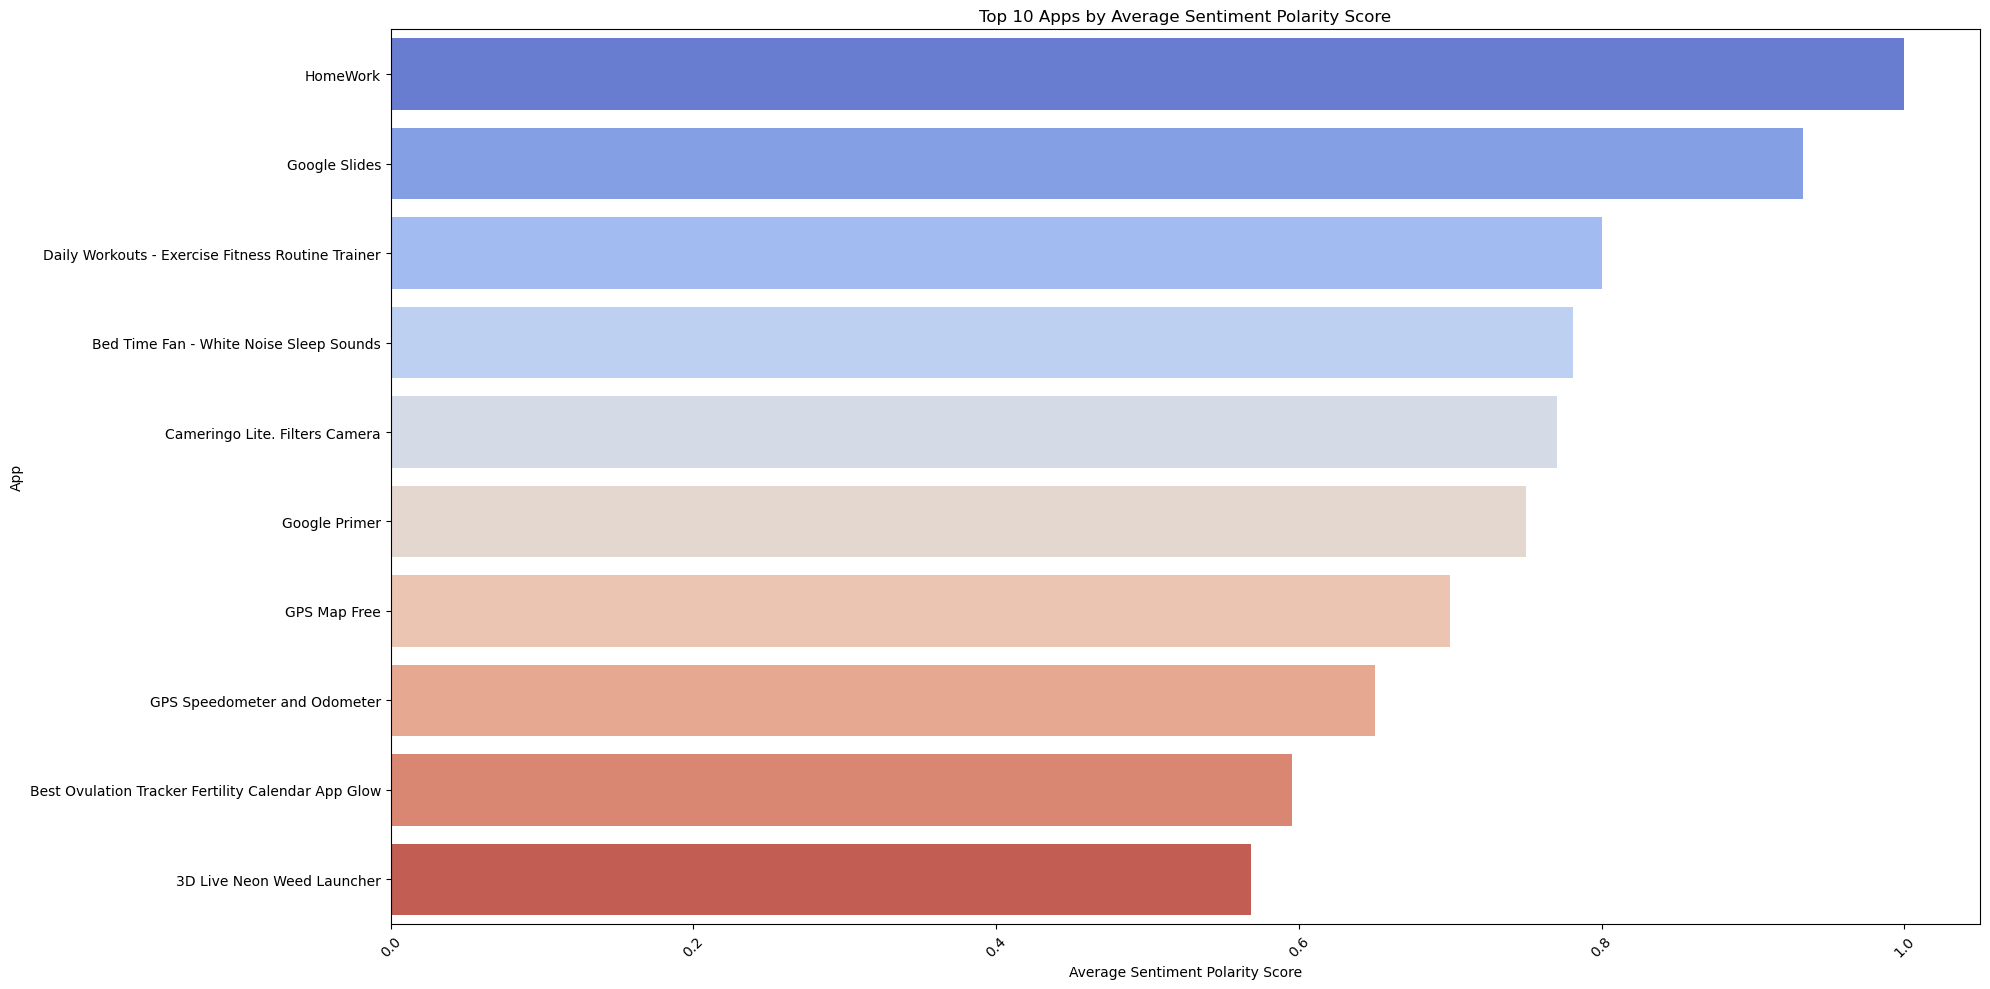

In [42]:
# Plotting the top 10 apps by average sentiment polarity score:
plt.figure(figsize=(20, 10), facecolor='white')
sns.barplot(x='sentiment_polarity_score', y='App',
            data=df_grouped.sort_values('sentiment_polarity_score', ascending=False).head(10), palette='coolwarm')
plt.title('Top 10 Apps by Average Sentiment Polarity Score')
plt.xlabel('Average Sentiment Polarity Score')
plt.ylabel('App')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visualization focuses on the top 10 apps with the highest average sentiment polarity scores, making it easier to differentiate and understand the sentiment towards these apps. The apps are sorted in descending order of their average sentiment polarity score, providing a clear view of which apps are receiving the most positive feedback based on user reviews

Apps with higher sentiment polarity scores likely enjoy better user engagement, as positive reviews can attract more users and encourage existing users to continue using the app. The correlation between sentiment and linguistic metrics with user engagement suggests that both the content and presentation of user feedback are important for app growth and retention strategies. Well-articulated, clear, and grammatically correct feedback may enhance the perception of professionalism and user-friendliness.

# How does the sentiment subjectivity score correlate with user engagement metrics across different app categories?

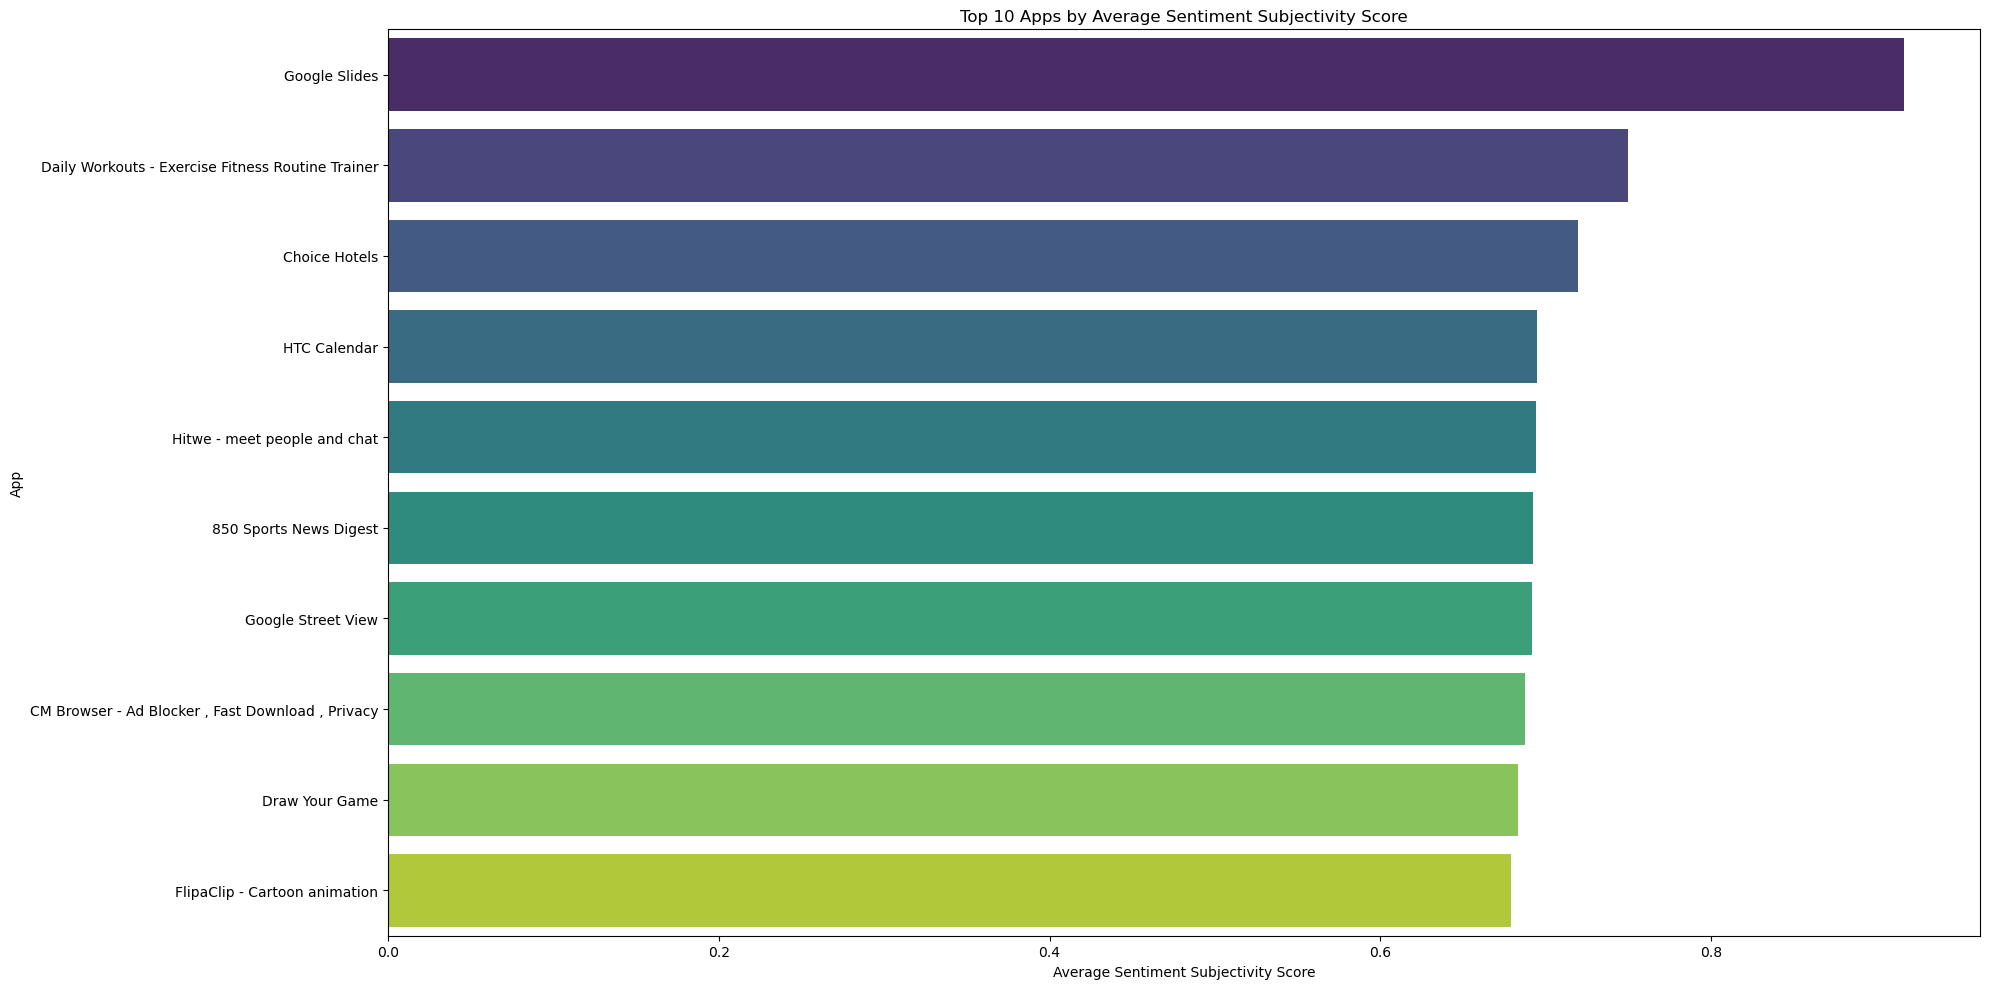

In [43]:
# Droping rows with missing values in critical columns
df.dropna(subset=['App', 'Translated_Review', 'sentiment_subjectivity_score'], inplace=True)

# Grouping by App and calculating mean sentiment subjectivity score
df_grouped = df.groupby('App')['sentiment_subjectivity_score'].mean().reset_index()

# Sorting the apps by their average sentiment subjectivity score
df_sorted = df_grouped.sort_values('sentiment_subjectivity_score', ascending=False)

# Visualization:
#Plotting the top 10 apps by average sentiment subjectivity score
plt.figure(figsize=(20, 10), facecolor='white')
sns.barplot(x='sentiment_subjectivity_score', y='App', data=df_sorted.head(10), palette='viridis')
plt.title('Top 10 Apps by Average Sentiment Subjectivity Score')
plt.xlabel('Average Sentiment Subjectivity Score')
plt.ylabel('App')
plt.tight_layout()
plt.show()

By focusing on the top 10 apps with the highest average sentiment subjectivity scores, we can identify which apps tend to receive more opinionated versus factual feedback.
These apps might be more polarizing or evoke stronger personal feelings among users. High subjectivity in reviews could indicate that users are more emotionally invested in the app, which could be a double-edged sword. While passionate users can be very engaged, they might also have higher expectations and more critical feedback.
Apps with more subjective reviews might need to focus on community management and user engagement strategies that address users' personal experiences and emotions. This could involve more personalized responses to reviews, community events, or features that encourage user expression.


## How does the sentiment subjectivity score correlate with user engagement metrics across different app categories? (Vignesh)

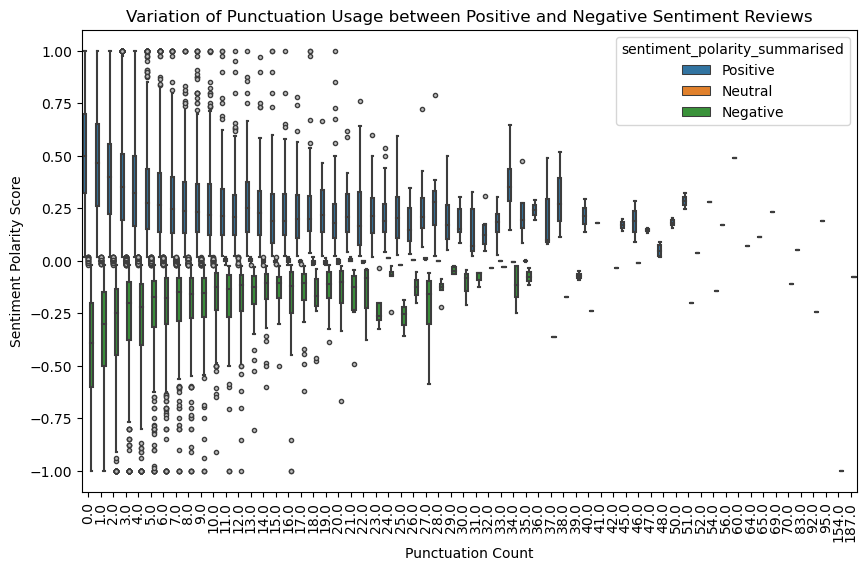

<Figure size 640x480 with 0 Axes>

In [44]:
#How does the use of punctuation vary between positive and negative sentiment reviews?
plt.figure(figsize=(10, 6))
outlier_style = dict(marker='o', markerfacecolor='0.75', markersize=3 ,linestyle='none')

ax=sns.boxplot(x='punctuations_count', y='sentiment_polarity_score', data=df, hue='sentiment_polarity_summarised', flierprops=outlier_style)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,)
plt.xlabel('Punctuation Count')
plt.ylabel('Sentiment Polarity Score')
plt.title('Variation of Punctuation Usage between Positive and Negative Sentiment Reviews')
plt.show()
plt.savefig('punctuation.png')

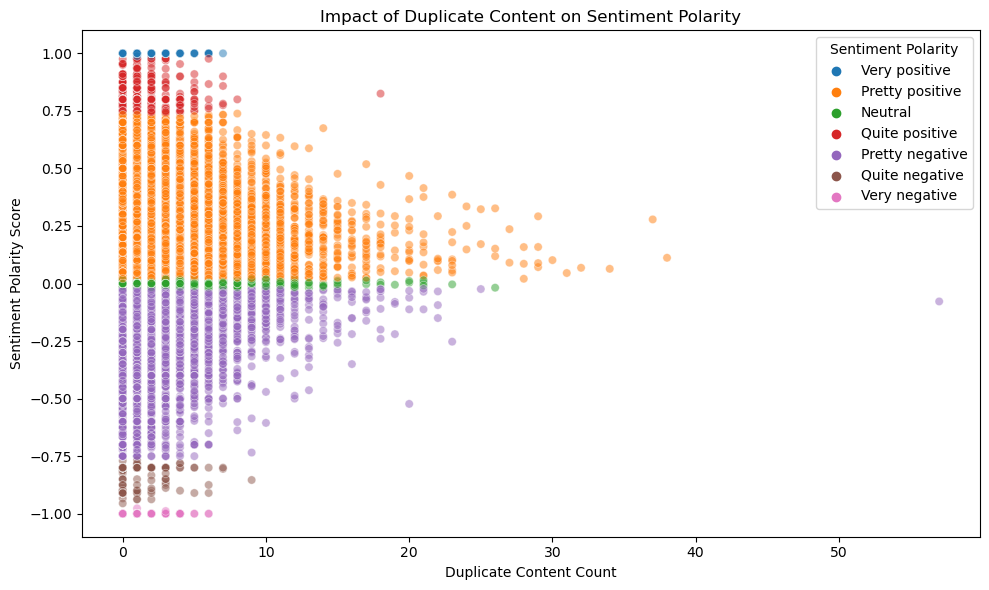

In [45]:
# Plotting the relationship between duplicates count and sentiment polarity
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(data=df, x='duplicates_count', y='sentiment_polarity_score', hue='sentiment_polarity', alpha=0.5)
plt.title('Impact of Duplicate Content on Sentiment Polarity')
plt.xlabel('Duplicate Content Count')
plt.ylabel('Sentiment Polarity Score')
plt.legend(title='Sentiment Polarity')
plt.tight_layout()
plt.show()

This scatterplot visualizes the relationship between the count of duplicate content in reviews and their sentiment polarity scores. Each point represents a review, with its position along the x-axis indicating the number of duplicate entries and along the y-axis showing the sentiment polarity score. The color coding represents different sentiment polarities (e.g., positive, neutral, negative).

From the graph, we can observe how the presence of duplicate content correlates with sentiment polarity scores. A dense clustering of points around lower duplicate counts suggests that most reviews have a unique content. However, as the duplicate count increases, we see a spread in sentiment polarity scores, indicating variability in how duplicate content might affect sentiment analysis.

This visualization helps in understanding whether duplicate content in reviews has a significant impact on their sentiment polarity, potentially indicating patterns or outliers that merit further investigation.

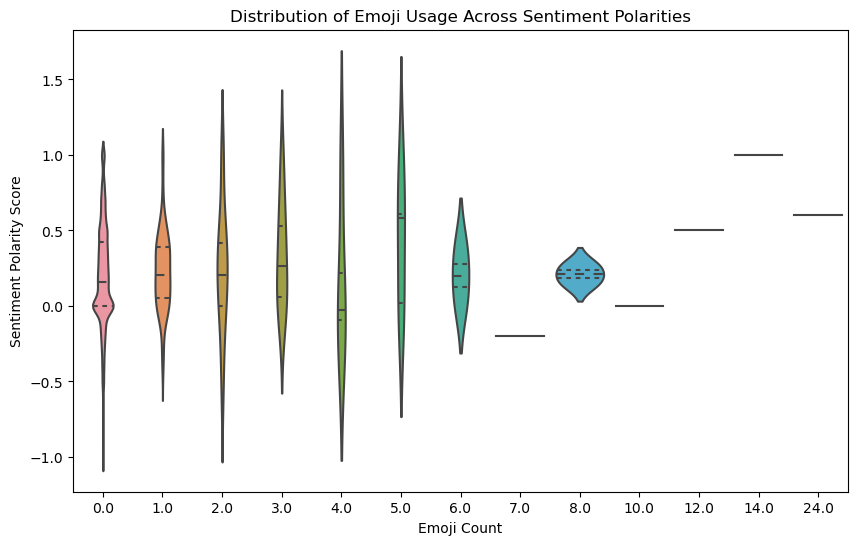

In [46]:
# Plotting the distribution of emoji usage across sentiment polarities
plt.figure(figsize=(10, 6))
sns.violinplot(x='emoji_count',y='sentiment_polarity_score', data=df, inner='quartile',orient='v')
plt.title('Distribution of Emoji Usage Across Sentiment Polarities')
plt.xlabel('Emoji Count')
plt.ylabel('Sentiment Polarity Score')
plt.show()

Distribution of Emoji Usage Across Sentiment Polarities: The violin plot below illustrates the distribution of emoji usage across different sentiment polarities. The plot shows a wide distribution of emoji counts across various sentiment polarities, indicating that emojis are used in reviews with a range of sentiments. The thickness of the plot at different points indicates the concentration of data points, with a wider section representing a higher density of reviews with a particular emoji count and sentiment polarity score.

The distribution of emoji usage across different sentiment polarities is illustrated in the violin plot above. This plot provides insights into how emojis are used in reviews with varying sentiment scores. Here are some key observations:

Broad Distribution: The plot shows a broad distribution of emoji counts across sentiment polarities, indicating that emojis are utilized in reviews with a wide range of sentiments, from negative to positive. Density Variation: The thickness of the plot varies at different sentiment scores, reflecting the density of reviews with certain emoji counts and sentiment scores. A thicker section suggests a higher concentration of reviews. Sentiment Polarity: The plot spans across the sentiment polarity score axis, showing that emojis are not confined to any specific sentiment category but are used across the spectrum. This analysis suggests that emojis are a versatile tool for expression in reviews, used by reviewers to convey emotions and sentiments of varying intensities.



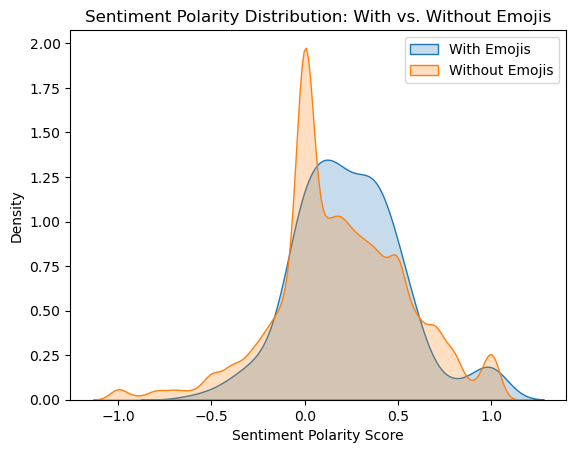

In [49]:
#How does the sentiment conveyed through emojis align with the overall sentiment?


# Filter Data
# Reviews with emojis have emoji_count > 0
df_with_emojis = df[df['emoji_count'] > 0]
df_without_emojis = df[df['emoji_count'] == 0]

# Analyze Sentiment
# We'll focus on 'sentiment_polarity_score' for sentiment analysis

# Step 4: Plot the Data
plt.figure(facecolor='white')
sns.kdeplot(df_with_emojis['sentiment_polarity_score'], label='With Emojis', fill=True)
sns.kdeplot(df_without_emojis['sentiment_polarity_score'], label='Without Emojis', fill=True)
plt.title('Sentiment Polarity Distribution: With vs. Without Emojis')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Density')
plt.legend()

plt.show()

Explanation of the Analysis and Plot:

This code first loads the dataset and separates the reviews into two groups based on whether they contain emojis. It then uses a kernel density estimate (KDE) plot to visualize the distribution of sentiment polarity scores for both groups. The plot will show how sentiment polarity (ranging from negative to positive) is distributed among reviews with and without emojis. By comparing these distributions, we can infer if the presence of emojis in reviews correlates with a particular sentiment polarity. For example, if reviews with emojis tend to have higher sentiment polarity scores, it might suggest that emojis are used more frequently in positive contexts. This analysis provides insights into the role of emojis in expressing sentiments in app reviews and how they align with the textual sentiment conveyed by the reviewers.

Comparison of Sentiment Polarity and Subjectivity:
#Question 1: Are there reviews that exhibit a discrepancy between sentiment polarity and subjectivity scores?

To analyze the discrepancy between sentiment polarity and subjectivity scores in reviews, we can follow these steps:

Load the Data: Load the dataset to analyze the reviews. Calculate Discrepancy: Define a metric to quantify the discrepancy between sentiment polarity and subjectivity scores. Identify Reviews with Discrepancy: Filter reviews based on a threshold of discrepancy to identify significant cases. Plot the Data: Create a scatter plot to visualize the relationship between sentiment polarity and subjectivity scores, highlighting reviews with significant discrepancies. Interpret the Results: Provide insights based on the plot and the identified discrepancies. Here's the Python code to perform this analysis and plot the graph:

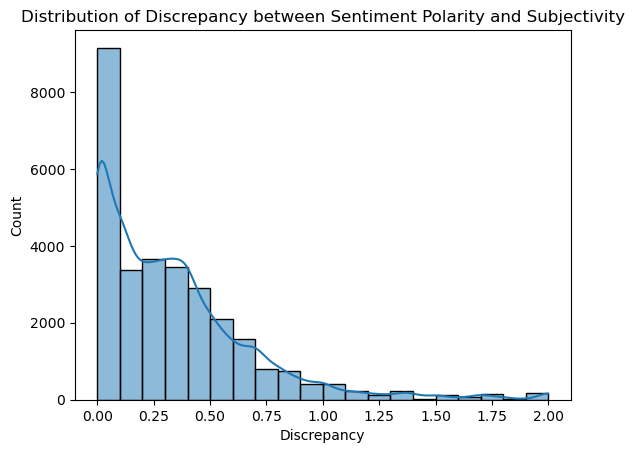

In [50]:
# Are there reviews that exhibit a discrepancy between sentiment polarity and subjectivity scores? 

# Filter out rows with missing values in sentiment polarity and subjectivity
filtered_data = df[['sentiment_polarity_score', 'sentiment_subjectivity_score']].dropna()

# Calculate the discrepancy between sentiment polarity and subjectivity
filtered_data['polarity_subjectivity_discrepancy'] = abs(filtered_data['sentiment_polarity_score'] - filtered_data['sentiment_subjectivity_score'])

# Plot the distribution of the discrepancy
sns.histplot(data=filtered_data, x='polarity_subjectivity_discrepancy', bins=20, kde=True)
plt.title('Distribution of Discrepancy between Sentiment Polarity and Subjectivity')
plt.xlabel('Discrepancy')
plt.ylabel('Count')
plt.show()


The histogram provides a visual representation of how frequently different levels of discrepancy between sentiment polarity and subjectivity scores occur within the dataset. The KDE overlay offers a smoothed approximation of the distribution, making it easier to identify patterns such as the most common discrepancy values or the spread of the data. This analysis can help in understanding the relationship between sentiment polarity and subjectivity in the dataset, particularly in identifying if there are many reviews where these two measures significantly diverge, which could indicate nuanced or complex sentiments being expressed in the reviews.